# Project: Wrangling and Analyze Data

## Introduction

#### Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.



## Project goal: 
#### wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.


## In this project, you will work on the following three datasets:

#### - Enhanced Twitter Archive
#### -  Twitter API & tweet_json
#### - Image Predictions File

## The tasks in this project are as follows:

#### 1.Gathering data
#### 2.Assessing data
#### 3.Cleaning data
#### 4.Storing data
#### 5.Analyzing, and visualizing data
#### 6.Reporting






In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Read Enhanced Twitter Archive file
twitter_arch=pd.read_csv('twitter-archive-enhanced (12).csv', encoding='utf8', sep=',')
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_arch.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Read Image Predictions file
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
image_predictions= requests.get(url)
with open('image-predictions.tsv', 'wb') as file:
    file.write(image_predictions.content)
    
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
image_predictions.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json2.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = twitt

In [7]:
# Read  Twitter json file
tweet_json = pd.read_json('tweet-json2.txt' , lines=True)

In [8]:
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
# Create df_tweet dataframe with tweet id, retweet count and favorite count columns and rename id to tweet_id
df_tweet = pd.DataFrame(tweet_json, columns = ['id', 'retweet_count', 'favorite_count'])
df_tweet = df_tweet.rename(columns={'id': 'tweet_id'})
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
df_tweet.shape

(2354, 3)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Assess the Twitter archive table

In [11]:
# Show sample from dataset
twitter_arch.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1310,707038192327901184,NaN,NaN,2016-03-08 03:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kathmandu. He sees every move you make...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707038192...,10,10,Kathmandu,None,None,None,None
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
2243,667902449697558528,NaN,NaN,2015-11-21 03:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cleopatricia. She is a northern Paperb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667902449...,9,10,Cleopatricia,None,None,None,None
1973,673213039743795200,NaN,NaN,2015-12-05 18:51:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He just got some big news. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673213039...,10,10,Dexter,None,None,None,None
1423,697995514407682048,NaN,NaN,2016-02-12 04:07:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman quit playin I jus wanna wheat t...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/697995514...,11,10,None,None,None,None,None
1101,735635087207878657,NaN,NaN,2016-05-26 00:54:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He hasn't grow into his skin y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735635087...,11,10,Dakota,None,None,None,None
1996,672591762242805761,NaN,NaN,2015-12-04 01:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Taz. He boxes leaves. 10/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591762...,10,10,Taz,None,None,None,None
263,842535590457499648,NaN,NaN,2017-03-17 00:38:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She lost her body saving a chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842535590...,13,10,Winnie,None,None,None,None
1402,699423671849451520,NaN,NaN,2016-02-16 02:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't ever talk to me or my son again."" ...bo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699423671...,10,10,None,None,None,None,None
597,798694562394996736,NaN,NaN,2016-11-16 01:09:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what's happening h...,7.012147e+17,4.196984e+09,2016-02-21 01:19:47 +0000,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None


In [12]:
print(twitter_arch.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# Show if the dataset has missing values
twitter_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
# Show dataset columns
twitter_arch.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [15]:
# Show if their any duplicated 
twitter_arch.duplicated().sum()

0

In [16]:
# Show the name column values counts
twitter_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
# Show unique names
twitter_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [18]:
# Show value counts for doggo , floofer , pupper  and puppo
print(twitter_arch.doggo.value_counts())
print("------------------------------------")

print(twitter_arch.floofer.value_counts())
print("------------------------------------")

print(twitter_arch.pupper.value_counts())
print("------------------------------------")

print(twitter_arch.puppo.value_counts())
print("------------------------------------")

None     2259
doggo      97
Name: doggo, dtype: int64
------------------------------------
None       2346
floofer      10
Name: floofer, dtype: int64
------------------------------------
None      2099
pupper     257
Name: pupper, dtype: int64
------------------------------------
None     2326
puppo      30
Name: puppo, dtype: int64
------------------------------------


### Quality issues

#### 1.Incorrect data types in the tweet_id , timestamp and retweeted_status_timestamp columns  .

#### 2.There are some rows have incorrect dog names like: "None" ,"a" ,"an","Al","O".

#### 3.Must be merge rating_numerator and rating_denominator in one column (Rating) to become it easier to use it in analysis.

#### 4.There are some tweets after August 1st, 2017

#### 5.The dataset contains retweets.

#### 6.The source format must be reformatted in order for it to be readable.



### Tidiness issues

#### 1.Must be merge the stages of dogs(doggo, floofer, pupper, puppo) in one column.
#### 2.Need to be dropped some unnecessary columns.

## Assess the images predictions table

In [19]:
# Show sample from dataset 
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
373,672988786805112832,https://pbs.twimg.com/media/CVbvjKqW4AA_CuD.jpg,1,Lakeland_terrier,0.836632,True,West_Highland_white_terrier,0.073900,True,wire-haired_fox_terrier,0.038160,True
1451,776477788987613185,https://pbs.twimg.com/media/CsaaaaxWgAEfzM7.jpg,1,Labrador_retriever,0.884839,True,Chesapeake_Bay_retriever,0.057565,True,paintbrush,0.005766,False
1599,799422933579902976,https://pbs.twimg.com/media/Cxge6AdUQAAvXLB.jpg,1,miniature_pinscher,0.583630,True,redbone,0.276095,True,toy_terrier,0.018550,True
556,677673981332312066,https://pbs.twimg.com/media/CWeU5LBWEAA8F0J.jpg,1,Maltese_dog,0.817908,True,Angora,0.077805,False,Pomeranian,0.022184,True
1810,832769181346996225,https://pbs.twimg.com/media/C46UmzSVMAAqBug.jpg,1,jersey,0.895698,False,sweatshirt,0.089085,False,poncho,0.002975,False
1369,761976711479193600,https://pbs.twimg.com/media/CpMVxoRXgAAh350.jpg,3,Labrador_retriever,0.475552,True,Chesapeake_Bay_retriever,0.082898,True,Staffordshire_bullterrier,0.048464,True
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True
691,684200372118904832,https://pbs.twimg.com/media/CX7EkuHWkAESLZk.jpg,1,llama,0.681347,False,ram,0.120142,False,hog,0.043686,False
1400,768609597686943744,https://pbs.twimg.com/media/CqqmWa7WcAAIM-n.jpg,1,basenji,0.183283,True,Italian_greyhound,0.136012,True,whippet,0.060130,True
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True


In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# Show image_predictions dataset columns
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [22]:
# show if the dataset has missing values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
# Show if their any duplicated 
image_predictions.duplicated().sum()

0

In [24]:
# Show the p1 column values counts
print(image_predictions.p1.value_counts())

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64


In [25]:
# Show statistics description for image_predictions dataset
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality issues

#### 1.Incorrect data type in the tweet_id

#### 2.There are mixed between capitalized and uncapitalized in dog breeds names



### Tidiness issues

#### 1.image_predictions table  must be merge to twitter_arch table.

#### 2.Need to be dropped some unnecessary columns.





## Assess the Twitter API & json table

In [26]:
# Show sample from dataset 
df_tweet.sample(20)

,tweet_id,retweet_count,favorite_count
517,810657578271330305,3057,12192
253,844580511645339650,3533,17871
499,813112105746448384,3225,11515
567,802185808107208704,314,0
715,783821107061198850,2269,8209
450,818627210458333184,8564,24597
967,750132105863102464,1440,3990
980,749403093750648834,622,2892
986,748977405889503236,3759,11235
1857,675497103322386432,1443,3397


In [27]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [28]:

# show if the dataset has missing values
df_tweet.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [29]:
# Show if their any duplicated 
df_tweet.duplicated().sum()

0

In [30]:
# Show statistics description for df_tweet dataset
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

#### 1.Incorrect data type in the tweet_id



### Tidiness issues

#### 1.df_tweet table  must be merge to twitter_arch table.

#### 2.Need to be dropped some unnecessary columns.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data
twitter_arch_clean= twitter_arch.copy()
image_predictions_clean = image_predictions.copy()
df_tweet_clean = df_tweet.copy()


In [32]:
# Show first three rows from twitter_arch_clean dataset
twitter_arch_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [33]:
# Show first three rows from image_predictions_clean dataset
image_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [34]:
# Show first three rows from df_tweet_clean dataset
df_tweet_clean.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Cleaning Twitter archive table

### Issue #1: 

Incorrect data types in tweet_id, timestamp and retweeted_status_timestamp.

##### Define:
Fixing the data types in tweet_id  from int64 format to object format , timestamp and retweeted_status_timestamp from object format to date format .

#### Code

In [35]:
## change the type of tweet_id to be Object 
twitter_arch_clean.tweet_id = twitter_arch_clean.tweet_id.astype(str)


#### Test

In [36]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2:
Invalid dog names in the  name column.

#### Define
Fixing all incorrect dog names in the name column by replace it with string "None".

#### Code

In [37]:
# replace all invalid names with "None"
twitter_arch_clean['name'][twitter_arch_clean['name'].str.match('[a-z]+')] = 'None'

C:\Users\rawan\AppData\Local\Temp\ipykernel_36120\2577651028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_arch_clean['name'][twitter_arch_clean['name'].str.match('[a-z]+')] = 'None'


#### Test

In [38]:
twitter_arch_clean.name.value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

### Issue #3:
Merge rating_numerator and rating_denominator in one column.

#### Define
Create a rating column by dividing rating_numerator values by rating_denominator values.


#### Code

In [39]:
#first should be convert the data type to float and then find rating by dividing them
twitter_arch_clean['rating_numerator']= twitter_arch_clean['rating_numerator'].astype(float)
twitter_arch_clean['rating_denominator']= twitter_arch_clean['rating_denominator'].astype(float)
twitter_arch_clean['rating'] = twitter_arch_clean['rating_numerator']/twitter_arch_clean['rating_denominator']

In [40]:
# Drop rating_numerator and rating_denominator columns
twitter_arch_clean.drop(['rating_numerator' , 'rating_denominator'], axis=1 , inplace=True)

#### Test

In [41]:
# show the first 3 rows
twitter_arch_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2


In [42]:
twitter_arch_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'rating'],
      dtype='object')

### Issue #4:
 Drop the  tweets after August 1st, 2017

#### Define
We not need to gather the tweets beyond August 1st, 2017, should be dropped it.


In [43]:
twitter_arch_clean.timestamp.value_counts()

2017-08-01 16:23:56 +0000    1
2016-01-13 02:43:46 +0000    1
2016-01-15 02:41:12 +0000    1
2016-01-15 02:08:05 +0000    1
2016-01-15 01:25:33 +0000    1
                            ..
2016-09-11 21:34:30 +0000    1
2016-09-10 23:54:11 +0000    1
2016-09-10 16:03:16 +0000    1
2016-09-09 18:31:54 +0000    1
2015-11-15 22:32:08 +0000    1
Name: timestamp, Length: 2356, dtype: int64

#### Code

In [44]:
# Dropping the tweets beyond August 1st, 2017
time_stamp = '2017-08-01 00:00:00'
twitter_arch_clean = twitter_arch_clean[(twitter_arch_clean['timestamp'] < time_stamp)]

#### Test

In [45]:
twitter_arch_clean.timestamp.unique()

array(['2017-07-31 00:18:03 +0000', '2017-07-30 15:58:51 +0000',
       '2017-07-29 16:00:24 +0000', ..., '2015-11-15 23:21:54 +0000',
       '2015-11-15 23:05:30 +0000', '2015-11-15 22:32:08 +0000'],
      dtype=object)

In [46]:
twitter_arch_clean.timestamp.value_counts()

2017-07-31 00:18:03 +0000    1
2016-01-13 02:43:46 +0000    1
2016-01-15 02:41:12 +0000    1
2016-01-15 02:08:05 +0000    1
2016-01-15 01:25:33 +0000    1
                            ..
2016-09-10 16:03:16 +0000    1
2016-09-09 18:31:54 +0000    1
2016-09-08 20:45:53 +0000    1
2016-09-08 16:33:46 +0000    1
2015-11-15 22:32:08 +0000    1
Name: timestamp, Length: 2354, dtype: int64

### Issue #5:
Remove the retweets.

#### Define
We only need original tweets, not retweets.


#### Code

In [47]:
twitter_arch_clean = twitter_arch_clean.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)  
                         
                  

#### Test

In [48]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 2 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2354 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2354 non-null   object 
 4   source                 2354 non-null   object 
 5   text                   2354 non-null   object 
 6   expanded_urls          2295 non-null   object 
 7   name                   2354 non-null   object 
 8   doggo                  2354 non-null   object 
 9   floofer                2354 non-null   object 
 10  pupper                 2354 non-null   object 
 11  puppo                  2354 non-null   object 
 12  rating                 2354 non-null   float64
dtypes: float64(3), object(10)
memory usage: 257.5+ KB


In [49]:
twitter_arch_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'name', 'doggo', 'floofer', 'pupper',
       'puppo', 'rating'],
      dtype='object')

### Issue #6:
The source format not readable. 

#### Define
Source format is not good and hard to read  , we need  to fix it .


#### Code

In [50]:
# Show the value counts for source column
twitter_arch_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [51]:
# Modify the source column format
twitter_arch_clean.source = twitter_arch_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [52]:
twitter_arch_clean.source.value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Cleaning images predictions table

### Issue #1: 

Incorrect data types in tweet_id.

#### Define
Fixing the data type in tweet_id from int64 format to object format.

#### Code

In [53]:
# change the type of tweet_id to be Object :
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [54]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #3: 

The capitalize issue in dog breeds names.

#### Define
Change dog breeds names to capitalize .

#### Code

In [55]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.capitalize()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.capitalize()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.capitalize()

#### Test

In [56]:
image_predictions_clean.p1.unique()

array(['Welsh_springer_spaniel', 'Redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'Miniature_pinscher',
       'Bernese_mountain_dog', 'Box_turtle', 'Chow', 'Shopping_cart',
       'Miniature_poodle', 'Golden_retriever', 'Gordon_setter',
       'Walker_hound', 'Pug', 'Bloodhound', 'Lhasa', 'English_setter',
       'Hen', 'Desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'Three-toed_sloth', 'Ox', 'Malamute', 'Guinea_pig',
       'Soft-coated_wheaten_terrier', 'Chihuahua',
       'Black-and-tan_coonhound', 'Coho', 'Toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Llama',
       'Chesapeake_bay_retriever', 'Curly-coated_retriever', 'Dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'Seat_belt',
       'Snail', 'Miniature_schnauzer', 'Airedale', 'Triceratops', 'Swab',
       'Hay', 'Hyena', 'Jigsaw_puzzle', 'West_highland_white_terrier',
       'Toy_poodle', 'Giant_schnauzer', 'Vizsla', 'Vacuum', 'Rottweiler',
       'Siberian_husky', 'T

In [57]:
image_predictions_clean.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True


## Cleaning Twitter API table

### Issue #1: 

Incorrect data types in tweet_id.

#### Define
Fixing the data type in tweet_id from int64 format to object format.

#### Code

In [58]:
# change the type of tweet_id to be Object :
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

#### Test

In [59]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Tidiness issues

#### Define

#### 1.Must be merge the stages of dogs(doggo, floofer, pupper, puppo) in one column.

#### 2.image_predictions_clean table  must be merge to twitter_arch_clean table.

#### 3.df_tweet_clean table  must be merge to twitter_arch_clean  table as well.

#### 4.Need to be dropped some unnecessary columns.

#### Code

In [60]:
# Create dog_stage column 
twitter_arch_clean['dog_stage'] = twitter_arch_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [61]:
twitter_arch_clean[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(20)

,dog_stage,doggo,floofer,pupper,puppo
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None
10,NaN,None,None,None,None
11,NaN,None,None,None,None


In [62]:
# Drop 'doggo', 'floofer', 'pupper' and 'puppo' from dataset
twitter_arch_clean = twitter_arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [63]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 2 to 2355
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2354 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2354 non-null   object 
 4   source                 2354 non-null   object 
 5   text                   2354 non-null   object 
 6   expanded_urls          2295 non-null   object 
 7   name                   2354 non-null   object 
 8   rating                 2354 non-null   float64
 9   dog_stage              399 non-null    object 
dtypes: float64(3), object(7)
memory usage: 202.3+ KB


In [64]:
# Show dog_stage value counts 
twitter_arch_clean.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

In [65]:
# First, merge df_tweet_clean table to the df_twitter_archive_clean
twitter_arch_clean = pd.merge(twitter_arch_clean, image_predictions_clean, 
                                    on = ['tweet_id'], how = 'left')

In [66]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2354 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2354 non-null   object 
 4   source                 2354 non-null   object 
 5   text                   2354 non-null   object 
 6   expanded_urls          2295 non-null   object 
 7   name                   2354 non-null   object 
 8   rating                 2354 non-null   float64
 9   dog_stage              399 non-null    object 
 10  jpg_url                2073 non-null   object 
 11  img_num                2073 non-null   float64
 12  p1                     2073 non-null   object 
 13  p1_conf                2073 non-null   float64
 14  p1_dog                 2073 non-null   object 
 15  p2  

In [67]:
twitter_arch_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,...,1.0,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,...,2.0,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [68]:
# Second, merge df_image_predictions table to the df_twitter_archive_clean
twitter_arch_clean = pd.merge(twitter_arch_clean, df_tweet_clean, 
                                    on = ['tweet_id'], how = 'left')

In [69]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2354 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2354 non-null   object 
 4   source                 2354 non-null   object 
 5   text                   2354 non-null   object 
 6   expanded_urls          2295 non-null   object 
 7   name                   2354 non-null   object 
 8   rating                 2354 non-null   float64
 9   dog_stage              399 non-null    object 
 10  jpg_url                2073 non-null   object 
 11  img_num                2073 non-null   float64
 12  p1                     2073 non-null   object 
 13  p1_conf                2073 non-null   float64
 14  p1_dog                 2073 non-null   object 
 15  p2  

In [70]:
#drop unneeded columns
twitter_arch_clean = twitter_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'expanded_urls'], 1)
                                            

C:\Users\rawan\AppData\Local\Temp\ipykernel_36120\3501967114.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_arch_clean = twitter_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'expanded_urls'], 1)


In [71]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2354 non-null   object 
 1   timestamp       2354 non-null   object 
 2   source          2354 non-null   object 
 3   text            2354 non-null   object 
 4   name            2354 non-null   object 
 5   rating          2354 non-null   float64
 6   dog_stage       399 non-null    object 
 7   jpg_url         2073 non-null   object 
 8   img_num         2073 non-null   float64
 9   p1              2073 non-null   object 
 10  p1_conf         2073 non-null   float64
 11  p1_dog          2073 non-null   object 
 12  p2              2073 non-null   object 
 13  p2_conf         2073 non-null   float64
 14  p2_dog          2073 non-null   object 
 15  p3              2073 non-null   object 
 16  p3_conf         2073 non-null   float64
 17  p3_dog          2073 non-null   o

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
# Store data into twitter_archive_master.csv
twitter_arch_clean.to_csv('twitter_archive_master.csv', index=False)

In [73]:
#Read the dataset 
twitter_arch_master=pd.read_csv('twitter_archive_master.csv')

In [74]:
twitter_arch_master.head()

,tweet_id,timestamp,source,text,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0
1,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0
2,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0
3,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,None,1.3,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261.0,20562.0
4,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,Jax,1.3,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,Ice_lolly,0.193548,False,2158.0,12041.0


In [75]:
twitter_arch_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2354 non-null   int64  
 1   timestamp       2354 non-null   object 
 2   source          2354 non-null   object 
 3   text            2354 non-null   object 
 4   name            2354 non-null   object 
 5   rating          2354 non-null   float64
 6   dog_stage       399 non-null    object 
 7   jpg_url         2073 non-null   object 
 8   img_num         2073 non-null   float64
 9   p1              2073 non-null   object 
 10  p1_conf         2073 non-null   float64
 11  p1_dog          2073 non-null   object 
 12  p2              2073 non-null   object 
 13  p2_conf         2073 non-null   float64
 14  p2_dog          2073 non-null   object 
 15  p3              2073 non-null   object 
 16  p3_conf         2073 non-null   float64
 17  p3_dog          2073 non-null   o

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

## Insights:

### General Statistics for the dataset

In [76]:
twitter_arch_master.describe()

,tweet_id,rating,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.354000e+03,2354.0,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2352.000000,2352.000000
mean,7.426445e+17,inf,1.204052,0.594919,1.346333e-01,6.031239e-02,3160.954932,8056.681122
std,6.845740e+16,NaN,0.562110,0.271019,1.007040e-01,5.092896e-02,5285.263321,11790.089141
min,6.660209e+17,0.0,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,6.783975e+17,1.0,1.000000,0.366248,5.387110e-02,1.619920e-02,623.750000,1414.750000
50%,7.194596e+17,1.1,1.000000,0.589011,1.186220e-01,4.934910e-02,1469.500000,3603.000000
75%,7.992387e+17,1.2,1.000000,0.843911,1.955730e-01,9.193000e-02,3652.000000,10087.000000
max,8.918152e+17,inf,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000



#### The max retweeted  is 79515
#### The max likes is 132810
#### The min retweeted & likes is 0
#### The mean retweeted is 3160
#### The mean likes is 8056
#### Most of our dataset the rating was 1.2

### 1. What the dog names with highest average retweeted in 2016?

In [77]:
dog_name_retweet=twitter_arch_master[twitter_arch_master.timestamp.between('2016-01', '2016-12')].groupby('name')['retweet_count'].mean().sort_values(ascending=False)[:7]

In [78]:
dog_name_retweet

name
Hurley    21324.000000
Darrel    15043.000000
Rocco     13140.000000
Balto     12953.000000
Riley     12643.000000
Butter    12014.000000
Ruby      11595.333333
Name: retweet_count, dtype: float64

Text(0, 0.5, 'Average Retweets')

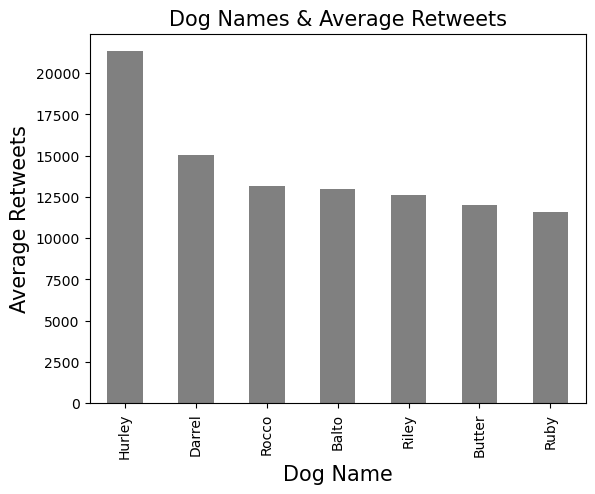

In [79]:
dog_name_retweet.plot(kind='bar',color='gray')
plt.title('Dog Names & Average Retweets', fontsize=15)
plt.xlabel('Dog Name', fontsize=15)
plt.ylabel('Average Retweets', fontsize=15)

### AS shown above the dog with highest average retweeted in 2016  is Hurley with  21324  retweets.

### 2. What is the max likes in each source ?

In [81]:
twitter_arch_master.groupby('source')['favorite_count'].max().sort_values(ascending=False)

source
Twitter for iPhone     132810.0
Vine - Make a Scene     47281.0
Twitter Web Client      35178.0
TweetDeck               18278.0
Name: favorite_count, dtype: float64

<AxesSubplot:ylabel=' '>

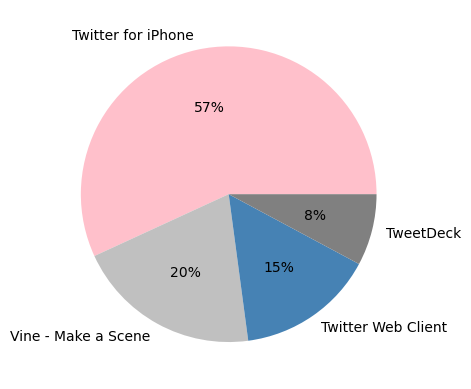

In [82]:
colors = ['pink', 'silver', 'steelblue','gray']
  
# Plotting the pie chart for the dataframe
twitter_arch_master.groupby('source')['favorite_count'].max().sort_values(ascending=False).plot(
    kind='pie',ylabel=" " ,
  autopct='%1.0f%%', colors=colors)

### As shown in the chart , the source with max likes is Twitter for iPhone with 132810 (57%).



In [83]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

###  3. What is the most popular dog names by average likes?

In [85]:
# import necessary libraries
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [86]:

text_word=twitter_arch_master.groupby('name')['favorite_count'].mean().sort_values(ascending=False)[:20]

In [87]:
text_word

name
Duddles     107956.000000
Aja          71144.000000
Canela       69871.000000
Stephan      53507.500000
Jamesy       53413.500000
Barney       48410.000000
Alfy         45880.000000
Dewey        43710.000000
Darla        42908.000000
Cupid        40325.000000
Lassie       39090.000000
Zoey         37860.333333
Clifford     37771.000000
Lilly        36698.500000
Maisey       36689.000000
Thor         36021.000000
Maya         35859.000000
Wiggles      35325.000000
Kody         35324.000000
Harry        35085.000000
Name: favorite_count, dtype: float64

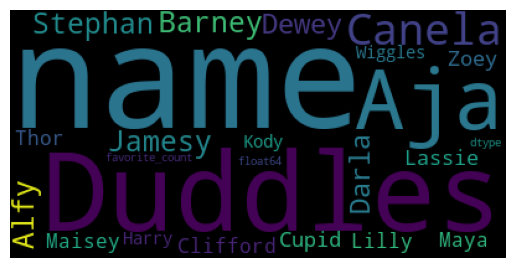

In [88]:
# Show most favorite dog names 
text = twitter_arch_master.groupby('name')['favorite_count'].mean().sort_values(ascending=False)[:20]

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### As shown in the chart most  popular dog names  is Duddles with 107956 likes (in the average).

### 4.What the highest dogs stage by average likes and retweets and the rating ?

In [89]:
twitter_arch_master.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False)

dog_stage
floofer    18576.750000
puppo      18119.135135
doggo      13940.860215
pupper      6497.636364
Name: favorite_count, dtype: float64

In [90]:
twitter_arch_master.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False)

dog_stage
floofer    6922.750000
puppo      6119.081081
doggo      6028.763441
pupper     2788.424242
Name: retweet_count, dtype: float64

In [91]:
twitter_arch_master.groupby('dog_stage')['rating'].mean().sort_values(ascending=False)

dog_stage
floofer    1.225000
puppo      1.210811
doggo      1.162366
pupper     1.077736
Name: rating, dtype: float64

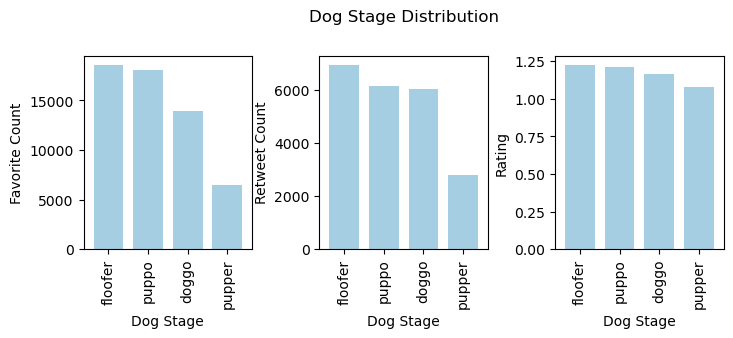

In [92]:
plt.subplot(2, 3, 1)
twitter_arch_master.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar',ylabel="Favorite Count",xlabel="Dog Stage",  # Plot a bar chart
            legend=False,
                                        # Turn the Legend off
            width=0.75,      # Set bar width as 75% of space available
            figsize=(8,5.8),  # Set size of plot in inches
            colormap='Paired')

plt.subplot(2, 3, 2)
twitter_arch_master.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False).plot(kind='bar',ylabel="Retweet Count",xlabel="Dog Stage",  # Plot a bar chart
            legend=False,
                                        # Turn the Legend off
            width=0.75,      # Set bar width as 75% of space available
            figsize=(8,5.8),  # Set size of plot in inches
            colormap='Paired')

plt.subplot(2, 3, 3)
twitter_arch_master.groupby('dog_stage')['rating'].mean().sort_values(ascending=False).plot(kind='bar',ylabel="Rating",xlabel="Dog Stage",  # Plot a bar chart
            legend=False,
                                        # Turn the Legend off
            width=0.75,      # Set bar width as 75% of space available
            figsize=(8,5.8),  # Set size of plot in inches
            colormap='Paired')

plt.suptitle("Dog Stage Distribution")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

### As shown above floofer is highest dog stage with 18576 liked and 6922 retweeted and 1.225 rating.

### 

### 